# Sales Analysis

## Import Libraries

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt

### Merge 12 months data into one file

In [5]:
onlyfiles = [x for x in os.listdir(r"C:\Users\User\Desktop\Sales_analysis_pandas\Sales_Data")]

sales_data = pd.DataFrame()

for file in onlyfiles:
    df = pd.read_csv(r"C:/Users/User/Desktop/Sales_analysis_pandas/Sales_Data/" + file)
    sales_data = pd.concat([sales_data, df])

sales_data.to_csv("all_month_data", index=False)

## Read Updated Dataframe

In [7]:
data = pd.read_csv(r"C:\Users\User\Desktop\Sales_analysis_pandas\all_month_data")
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


## Clean the data

In [10]:
# See how many Nan values in each column
data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [11]:
nan = data.index[data.isnull().all(1)]
data.iloc[nan]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


Drop Nan values

In [13]:
# Drop all Nan values
data = data.dropna(how="all")
data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

Remove rows with "Or" value in month column

In [15]:
data = data[data["Order Date"] != "Order Date"]

Convert columns to numeric type

In [17]:
data["Quantity Ordered"] = pd.to_numeric(data["Quantity Ordered"]) # Convert to int
data["Price Each"] = pd.to_numeric(data["Price Each"]) # Convert to float

Order the DataFrame

In [34]:
data = data[['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Sales', 'Month', 'Order Date', 'Purchase Address']]

## Add Month column

In [28]:
data["Order Date"].apply

<bound method Series.apply of 0         04/19/19 08:46
2         04/07/19 22:30
3         04/12/19 14:38
4         04/12/19 14:38
5         04/30/19 09:27
               ...      
186845    09/17/19 20:56
186846    09/01/19 16:00
186847    09/23/19 07:39
186848    09/19/19 17:30
186849    09/30/19 00:18
Name: Order Date, Length: 185950, dtype: object>

In [30]:
# Create new column month, extract first characters from Order Date column
data["Month"] = data["Order Date"].str[:2]
data["Month"] = data["Month"].astype("int32")
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


## Add Sales column

In [32]:
# Multiply quantity ordered by price column
data["Sales"] = data["Quantity Ordered"] * data["Price Each"]
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


## Add a city column

In [79]:
# Use apply method and lambda function
def get_city(address):
    return address.split(",")[1]
def get_state(address):
    return address.split(",")[2][1:3]

data["City"] = data["Purchase Address"].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

## Question 1: What was the best month for sales? How much was earned that month?

In [36]:
# Group by month and find the most profitable month
sales_by_month = data.groupby(["Month"]).agg(
    total_sales = ("Sales", "sum"))

sales_by_month

,total_sales
Month,
1,1822256.73
2,2202022.42
3,2807100.38
4,3390670.24
5,3152606.75
6,2577802.26
7,2647775.76
8,2244467.88
9,2097560.13


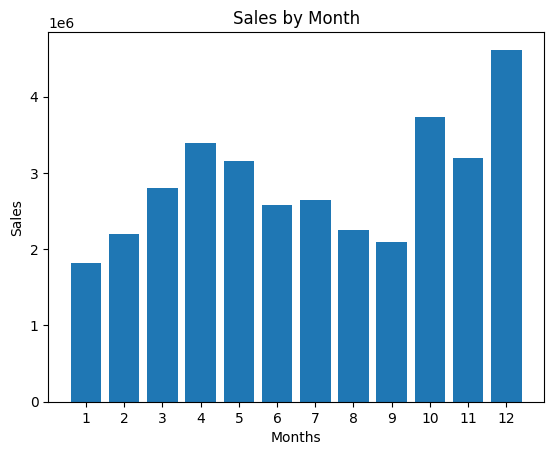

In [38]:
months = range(1, 13)

plt.bar(months, sales_by_month["total_sales"])
plt.xticks(months)
plt.xlabel("Months")
plt.ylabel("Sales")
plt.title("Sales by Month")
plt.show()

## Question 2: Which city had the highest number of sales?

In [95]:
sales_by_city = data.groupby("City").agg(Sales = ("Sales", "sum"))
sales_by_city

,Sales
City,
Atlanta (GA),2795498.58
Austin (TX),1819581.75
Boston (MA),3661642.01
Dallas (TX),2767975.40
Los Angeles (CA),5452570.80
New York City (NY),4664317.43
Portland (ME),449758.27
Portland (OR),1870732.34
San Francisco (CA),8262203.91


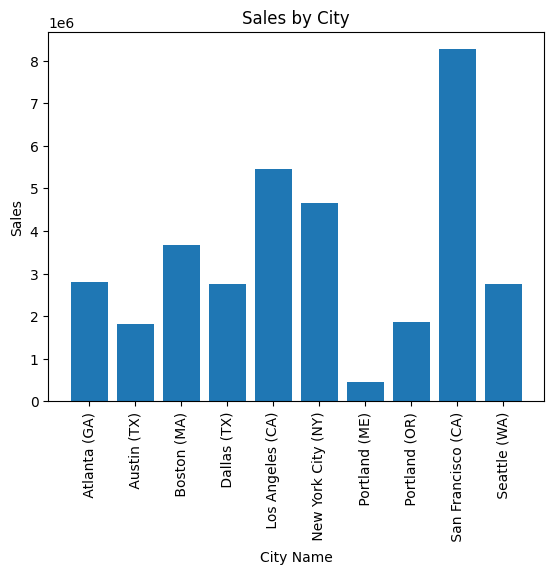

In [121]:
cities = list(sales_by_city.index)

plt.bar(cities, sales_by_city["Sales"], align='center')
plt.xticks(cities, rotation="vertical")
plt.xlabel("City Name")
plt.ylabel("Sales")
plt.title("Sales by City")
plt.show()

## Question 3: What time should we display advertisements to maximize the likehood of purchases?

In [134]:
# Convert Order Date column to datetime type
data["Order Date"] = pd.to_datetime(data["Order Date"], format='%m/%d/%y %H:%M')

In [142]:
data["Hour"] = data["Order Date"].dt.hour
data["Minute"] = data["Order Date"].dt.minute

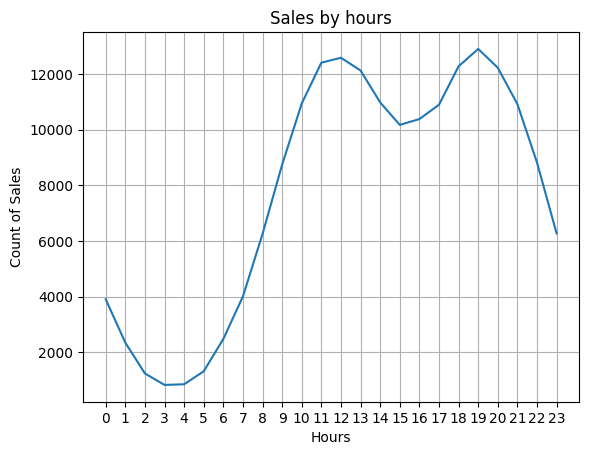

In [164]:
# Find Sales count for each hour
sales_by_hours = data.groupby(["Hour"]).agg(sales = ("Sales", "count"))

# Plot hours
hours = sales_by_hours.index

plt.plot(hours, sales_by_hours["sales"])
plt.xticks(hours)
plt.xlabel("Hours")
plt.ylabel("Count of Sales")
plt.title("Sales by hours")
plt.grid()
plt.show()

# Midday hours(11-12am) and Evening (around 19pm) are peaks

## Question 4: What products are often sold together?

In [233]:
# Find rows where Order ID repeats
data2 = data[data["Order ID"].duplicated(keep=False)]

In [235]:
# Create new column Grouped Products
data2["Grouped Products"] = data2.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))



C:\Users\User\AppData\Local\Temp\ipykernel_13512\2384397560.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["Grouped Products"] = data2.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))


In [237]:
data2 = data2[["Order ID", "Grouped Products"]].drop_duplicates()
data2.head()

,Order ID,Grouped Products
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [241]:
# Use libraries to find most common pairs of products
from itertools import combinations
from collections import Counter

count = Counter()

for row in data2["Grouped Products"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)
    

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


## Question 5: What is the most sold product?

In [261]:
products_quantity = data.groupby("Product").agg(Quantity = ("Quantity Ordered", "sum"))
products_quantity

,Quantity
Product,
20in Monitor,4129
27in 4K Gaming Monitor,6244
27in FHD Monitor,7550
34in Ultrawide Monitor,6199
AA Batteries (4-pack),27635
AAA Batteries (4-pack),31017
Apple Airpods Headphones,15661
Bose SoundSport Headphones,13457
Flatscreen TV,4819


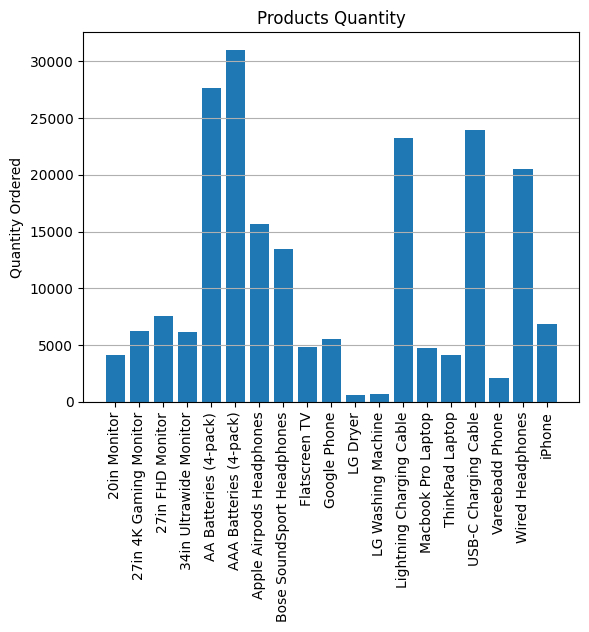

In [279]:
# Vizualize products quantity
products = products_quantity.index

plt.bar(products, products_quantity["Quantity"])
plt.xticks(products, rotation="vertical")
plt.title("Products Quantity")
plt.grid(axis='y')
plt.ylabel("Quantity Ordered")
plt.show()
